# Boolean Network Analysis Example
This notebook demonstrate how to run simulation on a Boolean Network using BNMPy.

In [2]:
import sys
import numpy as np
sys.path.append('./src')
from BNMPy import BMatrix, booleanNetwork, vis
from BNMPy.steady_state import SteadyStateCalculator

## Load a Boolean Network

The first step is to load a Boolean Network.
Input file is a text file or a string containing the network definition, the format should look like this:  

- all genes must have their own equation (sometimes the equation is just A = A)
- each equation must have an equal sign and a space before and after it
- If the equation is a constant value (0 or 1), meaning that the gene is set as mutated/perturbed 

In [3]:
network_string = """
A = A
B = C
C = !E
D = A | B
E = C & D
F = !A & B
"""
network = BMatrix.load_network_from_string(network_string)

No initial state provided, using a random initial state
Network loaded successfully. There are 6 genes in the network.


In [4]:
# Optionally you can provide an initial state for later simulation
# This can be set in the next steps as well
initial_state = [0, 0, 0, 0, 0, 0]
network = BMatrix.load_network_from_string(network_string, initial_state=initial_state)

Network loaded successfully. There are 6 genes in the network.


We can also load a network from a txt file directly.

In [5]:
network_file = 'files/SimpleBN.txt'
network = BMatrix.load_network_from_file(network_file, initial_state=initial_state)

Network loaded successfully. There are 6 genes in the network.


## Visualize the network

We can visualize the network using `vis.vis_network(network)`. It will show the network structure and color the nodes based on their in/out degrees.

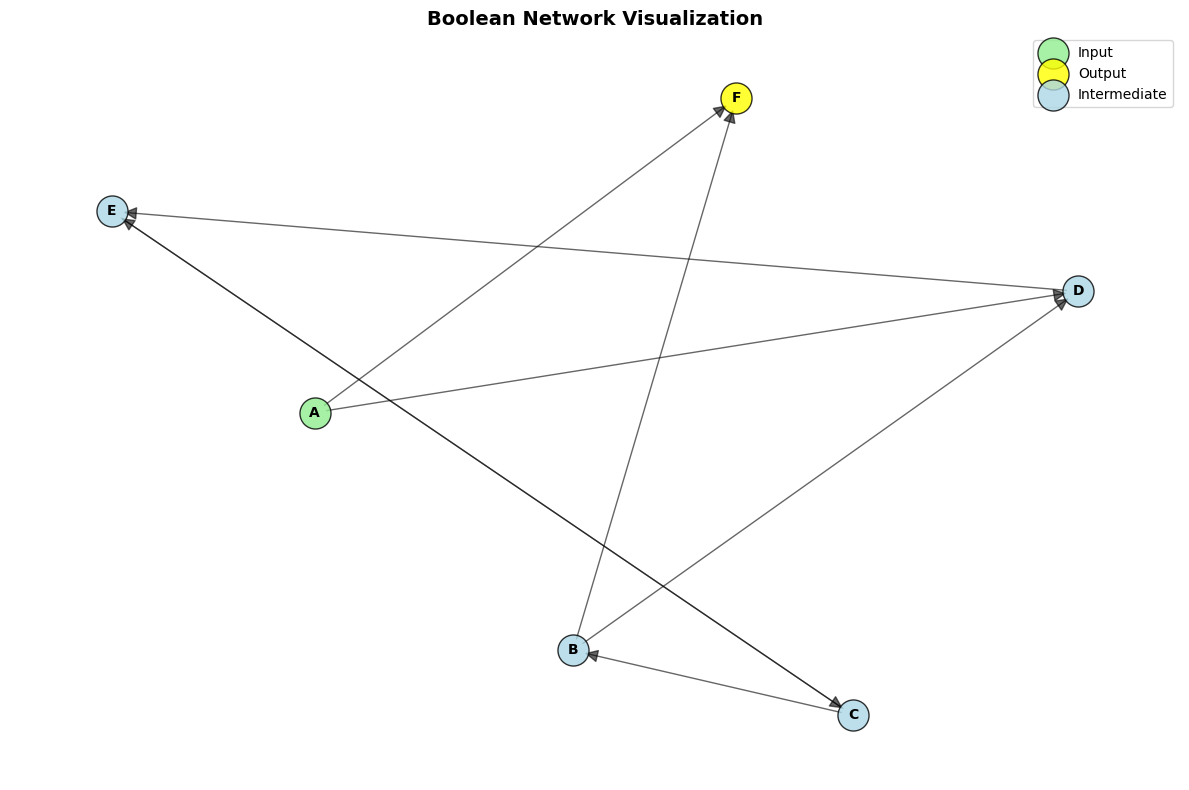

In [8]:
vis.vis_network(network)

For larger networks, you might want to see the network interactively.  
You can use the `interactive=True` option to save the network as an html file, and open it in your browser.  
The rules of each node are shown when hovering over the node.  

In [5]:
vis.vis_network(network, output_html="files/SimpleBN.html", interactive=True)

Network visualization saved to SimpleBN.html


## Update the network

BNMPy offers two ways to run simulation on a Boolean Network.
1. Update the network deterministically
2. Update the network stochastically with noise

### Deterministic simulation

In [6]:
# simulate for 5 steps
network.update(5)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1]], dtype=int8)

In [7]:
# we can set the initial states here
network.setInitialValues([1, 1, 1, 1, 1, 1])
network.update(5)

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 0]], dtype=int8)

In [8]:
# you can also set inital state for individual nodes
network.setInitialValue('A', 0)
network.update(5)

array([[0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1]], dtype=int8)

### Stochastic simulation

For stochastic simulation, noise will be added to the network using p, meaning that the probability of a node being flipped is p.

In [9]:
np.random.seed(99) # for reproducibility
# set initial state
network.setInitialValues([0, 0, 0, 0, 0, 0])
# using 5% noise
network.update_noise(p=0.05, iterations=10)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1]], dtype=int8)

## Pertubations

BNMPy offers a function to perform pertubations on a network.

In [10]:
# set node B to constant value 1
network.knockout('B', 1)
network.update(5)

array([[0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1]], dtype=int8)

In [11]:
# reset previous perturbation
network.undoKnockouts()

# set node C to constant 0
network.knockout('C', 0)
network.update(5)

array([[0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int8)

## Steady state analysis

Next, we can compute the steady state of the network.  
Currently, BNMPy supports the synchronous updating mode. By updating the network for `n_steps` and repeating this `n_runs` times, we can find the attractors of the network.

In [18]:
calc = SteadyStateCalculator(network)
steady_state = calc.compute_steady_state(n_runs=20,n_steps=10000)

Found 0 fixed points and 2 cyclic attractors
--------------------------------
No fixed points found
--------------------------------
Cyclic attractors: 
Cyclic attractor 1: [[0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1]]
Cyclic attractor 2: [[1, 1, 0, 1, 0, 0], [1, 0, 1, 1, 1, 0]]
--------------------------------
Node order: dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])


Here we get two cyclic attractors for this network, the first with 3 states and the second with 2 states. 

In [5]:
steady_state

{'fixed_points': [],
 'cyclic_attractors': [[array([0, 0, 1, 0, 0, 0], dtype=int8),
   array([0, 1, 1, 1, 1, 1], dtype=int8),
   array([0, 1, 0, 1, 0, 1], dtype=int8)],
  [array([1, 0, 1, 1, 1, 0], dtype=int8),
   array([1, 1, 0, 1, 0, 0], dtype=int8)]]}

## Plot the simulation

In [15]:
# First, we simulate the network for 200000 steps
noise_level = 0.05 # noise
y = network.update_noise ( noise_level  , 200000) # simulation with noise

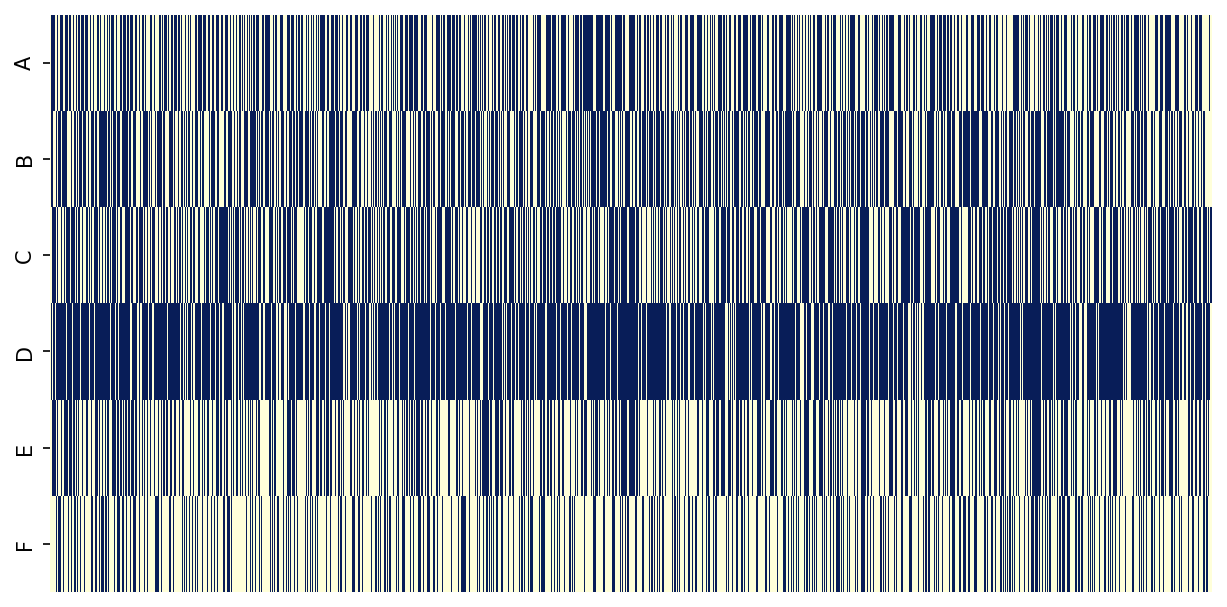

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot the simulation results
simulations = pd.DataFrame(y) 
simulations.columns = network.nodeDict.keys()
plt.figure(figsize=(10,5), dpi = 150)
# heapmap without clustering
sns.heatmap(simulations.transpose(), cmap="YlGnBu", cbar=False, xticklabels=False)
plt.show()

This heatmap shows the network states over 200000 steps.  
Next, we can look at how frequently the network will visit the dominant state as the simulation progress.

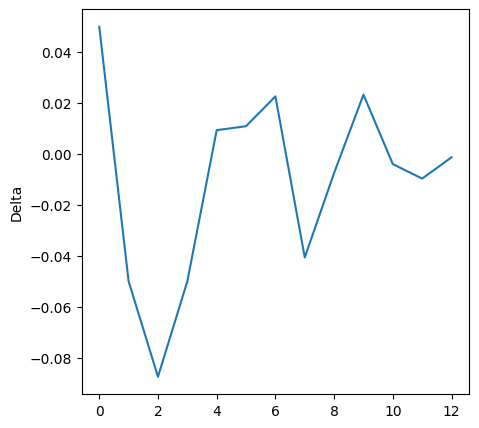

In [17]:
def count_state_frequency(simulations):
    """
    Compute the frequency of the most common state
    """
    dic_freq = {}
    for i in range(0,simulations.shape[0]):
        cur = simulations.iloc[i,:]
        cur = ','.join([str(x) for x in cur])
        if cur in dic_freq.keys():
            dic_freq[cur] += 1
        else:
            dic_freq[cur] = 1
    result = pd.DataFrame()
    state_list = []
    freq_list = []
    for key in dic_freq.keys():
        state_list.append(key)
        freq_list.append((dic_freq[key]/simulations.shape[0]))
    result['state'] = state_list
    result['freq'] = freq_list
    result.index = state_list
    result = result.drop(columns=['state'])
    return result.sort_values(by=['freq'],ascending=False)

all = pd.DataFrame()
delta = []
pre = count_state_frequency(simulations)

# exponentially growing windows
# e.g., 10, 20, 40, ..., up to 2^13 = 81920 steps
for i in range(0,14):
    cur = count_state_frequency(simulations.iloc[2**i*10:2**(i+1)*10,:])
    cur.columns = ["S"+str(i)]
    if i > 0:
        delta.append(cur.iloc[0,].values[0] - pre.iloc[0,].values[0])
    pre = cur
    all = pd.concat([all,cur],axis=1)

plt.figure(figsize=(5,5))
plt.ylabel("Delta")
plt.plot(delta)

Here each point measures the incremental gain or loss in the probability of the most frequently visited configuration when double the amount of data. Large positive or negative spikes mean that the distribution is shifting; zero indicate that the estimate is converging.

In this network the frequency oscillates until 10^10-step window (when delta becomes close to zero). The pattern suggests that after roughly 
10^4 - 10^5 updates the simulation has essentially settled, and we should be confident about our steady states if simulating the network for that long.